# Comparison of different modelling approaches on the route 15[3]

In [2]:
from dbanalysis import stop_tools
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns
from sklearn import metrics
import json

In [3]:
routes = json.loads(open('/home/student/dbanalysis/dbanalysis/resources/trimmed_routes.json').read())

In [4]:
route = routes['15'][1][1:]

In [28]:
print([r for r in route])

[6318, 6319, 7246, 6320, 4594, 4595, 4596, 4563, 1218, 1270, 1272, 1273, 1274, 1275, 1276, 1277, 1219, 1220, 1221, 664, 665, 666, 667, 668, 614, 615, 616, 617, 618, 619, 675, 4415, 301, 4495, 7581, 1283, 7579, 1285, 1016, 1017, 1018, 1019, 1020, 1076, 1077, 1078, 1079, 1080, 1081, 1082, 1083, 1085, 1121, 1122, 1123, 1124, 1125, 1127, 1130, 1140, 1141, 1142, 1143, 1144, 1145, 4869, 4870, 3007, 6283, 6282]


In [5]:
stop1 = stop_tools.stop_data(str(route[0]),str(route[1]))

In [9]:
stop1['traveltime']=stop1['actualtime_arr_to']-stop1['actualtime_arr_from']

/home/student/anaconda3/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


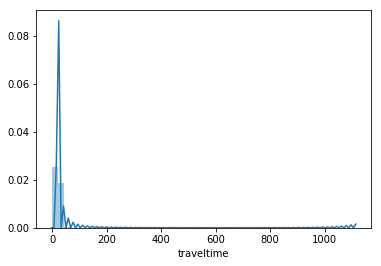

In [22]:
sns.distplot(stop1['traveltime'])

In [6]:
stopN = stop_tools.stop_data(str(route[-2]),str(route[-1]))

In [24]:
stopN['traveltime']=stopN['actualtime_arr_to']-stopN['actualtime_arr_from']

/home/student/anaconda3/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


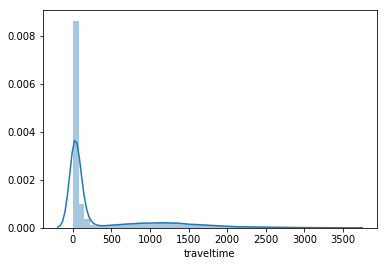

In [25]:
sns.distplot(stopN['traveltime'])

In [7]:
begins = stop1[[i for i in stop1.columns if i != 'actualtime_arr_to']]
ends = stopN[['tripid','actualtime_arr_to','dayofservice','routeid']]

In [8]:
wholeroutetime = pd.merge(begins,ends,on=['tripid','dayofservice','routeid'])

In [9]:
wholeroutetime['traveltime']=wholeroutetime['actualtime_arr_to']-wholeroutetime['actualtime_arr_from']

/home/student/anaconda3/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


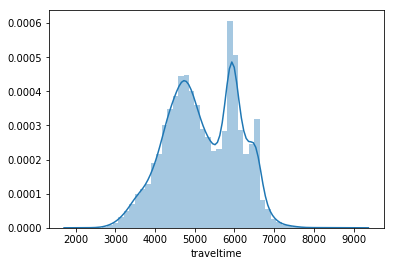

In [21]:
sns.distplot(wholeroutetime['traveltime'])

/home/student/anaconda3/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "
/home/student/anaconda3/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "
/home/student/anaconda3/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "
/home/student/anaconda3/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "
/home/student/anaconda3/lib/pyth

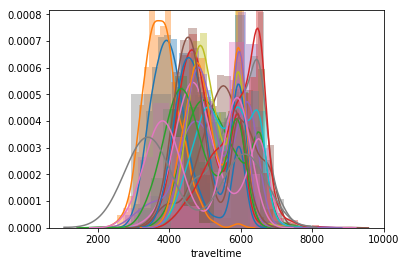

In [44]:
for hour in wholeroutetime['hour'].unique():
    sns.distplot(wholeroutetime[wholeroutetime['hour']==hour]['traveltime'])

/home/student/anaconda3/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "
/home/student/anaconda3/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "
/home/student/anaconda3/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "
/home/student/anaconda3/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "
/home/student/anaconda3/lib/pyth

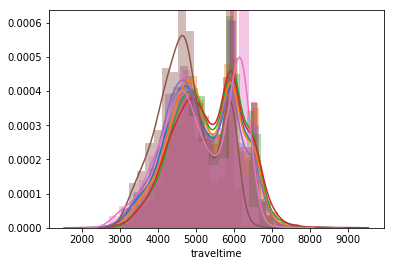

In [48]:
for hour in wholeroutetime['day'].unique():
    sns.distplot(wholeroutetime[wholeroutetime['day']==hour]['traveltime'])

In [ ]:
sns.d

In [35]:
mid_stop = stop_tools.stop_data('7581', '1283')

In [36]:
mid_stop['traveltime']=mid_stop['actualtime_arr_to']-mid_stop['actualtime_arr_from']

/home/student/anaconda3/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


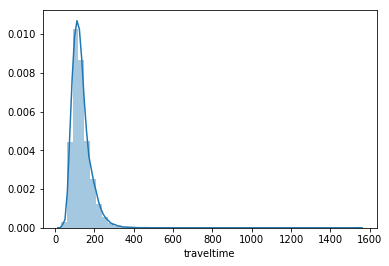

In [37]:
sns.distplot(mid_stop['traveltime'])

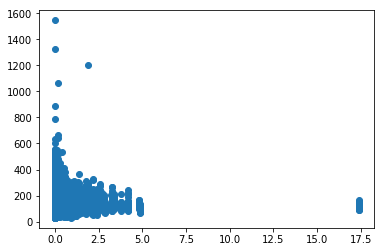

In [49]:
plt.scatter(mid_stop['rain'],mid_stop['traveltime'])

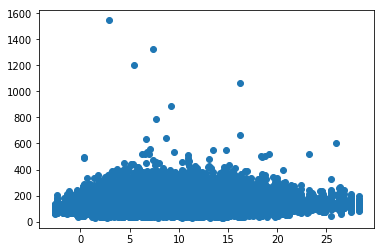

In [50]:
plt.scatter(mid_stop['temp'],mid_stop['traveltime'])

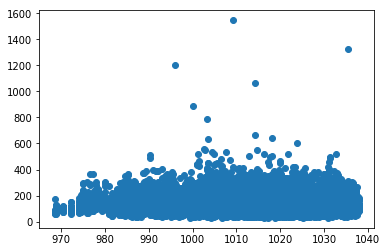

In [55]:
plt.scatter(mid_stop['msl'],mid_stop['traveltime'])

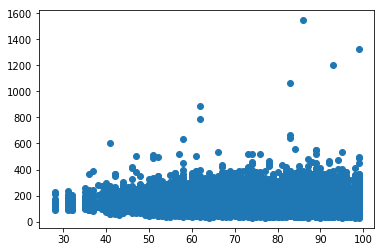

In [56]:
plt.scatter(mid_stop['rhum'],mid_stop['traveltime'])

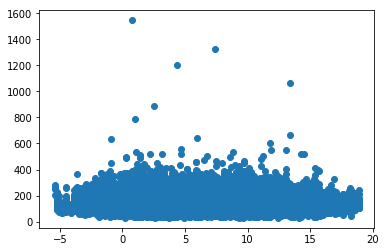

In [57]:
plt.scatter(mid_stop['dewpt'],mid_stop['traveltime'])

In [53]:
mid_stop.columns

Index(['index', 'dayofservice', 'tripid', 'plannedtime_arr_from',
       'plannedtime_dep_from', 'actualtime_arr_from', 'actualtime_dep_from',
       'plannedtime_arr_to', 'actualtime_arr_to', 'routeid', 'fromstop',
       'tostop', 'traveltime', 'dwelltime', 'distance', 'speed', 'dt', 'date',
       'day', 'month', 'hour', 'year', 'dewpt', 'msl', 'rain', 'rhum', 'temp',
       'vappr', 'wetb'],
      dtype='object')

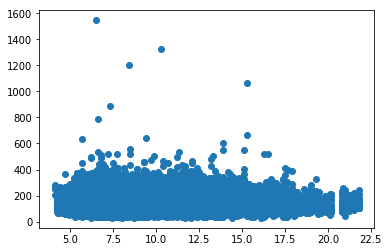

In [58]:
plt.scatter(mid_stop['vappr'],mid_stop['traveltime'])

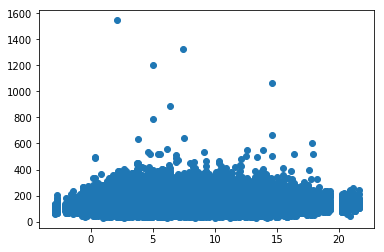

In [59]:
plt.scatter(mid_stop['wetb'],mid_stop['traveltime'])

In [ ]:
#rain, temp, dewpt,wetb poly
#msl rhum vappr linear

In [105]:
def preprocess(df):
    df['traveltime']=df['actualtime_arr_to']-df['actualtime_arr_from']
    df=df[df['traveltime']!=0]
    df=pd.get_dummies(df,columns=['hour','day','month'])
    for f in 'dewpt', 'msl', 'rain', 'rhum', 'temp', 'vappr', 'wetb':
        df[f+'2']=df[f]**2
    return df
    
    

In [63]:
mid_stop = preprocess(mid_stop)

In [64]:
mid_stop.columns

Index(['index', 'dayofservice', 'tripid', 'plannedtime_arr_from',
       'plannedtime_dep_from', 'actualtime_arr_from', 'actualtime_dep_from',
       'plannedtime_arr_to', 'actualtime_arr_to', 'routeid', 'fromstop',
       'tostop', 'traveltime', 'dwelltime', 'distance', 'speed', 'dt', 'date',
       'year', 'dewpt', 'msl', 'rain', 'rhum', 'temp', 'vappr', 'wetb',
       'hour_6', 'hour_7', 'hour_8', 'hour_9', 'hour_10', 'hour_11', 'hour_12',
       'hour_13', 'hour_14', 'hour_15', 'hour_16', 'hour_17', 'hour_18',
       'hour_19', 'hour_20', 'hour_21', 'hour_22', 'hour_23', 'day_0', 'day_1',
       'day_2', 'day_3', 'day_4', 'day_5', 'day_6', 'month_1', 'month_2',
       'month_3', 'month_4', 'month_5', 'month_6', 'rain2', 'temp2', 'wetb2',
       'dewpt2'],
      dtype='object')

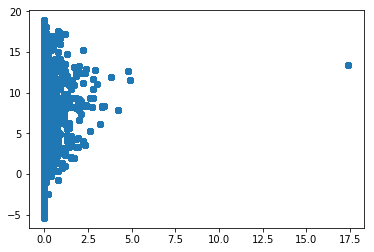

In [54]:
plt.scatter(mid_stop['rain'],mid_stop['dewpt'])

In [110]:
features = ['dewpt', 'msl', 'rain', 'rhum', 'temp', 'vappr', 'wetb',
       'hour_6', 'hour_7', 'hour_8', 'hour_9', 'hour_10', 'hour_11', 'hour_12',
       'hour_13', 'hour_14', 'hour_15', 'hour_16', 'hour_17', 'hour_18',
       'hour_19', 'hour_20', 'hour_21', 'hour_22', 'hour_23', 'day_0', 'day_1',
       'day_2', 'day_3', 'day_4', 'day_5', 'day_6', 'month_1', 'month_2',
       'month_3', 'month_4', 'month_5', 'month_6', 'rain2', 'temp2', 'wetb2',
       'dewpt2','msl2','rhum2','vappr2']

In [84]:
from sklearn.linear_model import LinearRegression as lr
rgr = lr(fit_intercept=True).fit(mid_stop[features],mid_stop['traveltime'])
preds = rgr.predict(mid_stop[features])
metrics.r2_score(mid_stop['traveltime'],preds)

0.25698661370348297

In [85]:
((abs(mid_stop['traveltime']-preds)/mid_stop['traveltime'])*100).mean()

23.91265546472524

In [70]:
metrics.mean_absolute_error(mid_stop['traveltime'],preds)

30.015811614427207

In [71]:
mid_stop['traveltime'].mean()

132.63818853138423

In [104]:
r2=0
mae = 0
mape = 0
count = 0
for i in range(0,1000):
    features = ['dewpt', 'msl', 'rain', 'rhum', 'temp', 'vappr', 'wetb','month_1', 'month_2',
       'month_3', 'month_4', 'month_5', 'month_6', 'rain2', 'temp2', 'wetb2',
       'dewpt2']
    try:
        stop = stop_tools.random_stop_data()
        stop=preprocess(stop)
        features += [i for i in stop.columns if (i != 'dayofservice'\
                    and i[0:3]=='day') or i [0:4]=='hour']
        rgr = lr(fit_intercept=True).fit(stop[features],stop['traveltime'])
        preds = rgr.predict(stop[features])
        r2+=metrics.r2_score(stop['traveltime'],preds)
        mae+=metrics.mean_absolute_error(stop['traveltime'],preds)
        mape+=((abs(stop['traveltime']-preds)/stop['traveltime'])*100).mean()
        del(stop)
        count+=1
    except:
        print('error')
    

error
error
error
error
error
error
error
error
error
error
error
error
error
error
error


In [120]:
print(features)

['dewpt', 'msl', 'rain', 'rhum', 'temp', 'vappr', 'wetb', 'month_1', 'month_2', 'month_3', 'month_4', 'month_5', 'month_6', 'rain2', 'temp2', 'wetb2', 'dewpt2', 'hour_6', 'hour_7', 'hour_8', 'hour_9', 'hour_10', 'hour_11', 'hour_12', 'hour_13', 'hour_14', 'hour_15', 'hour_16', 'hour_17', 'hour_18', 'hour_19', 'hour_20', 'hour_21', 'hour_22', 'hour_23', 'day_0', 'day_1', 'day_2', 'day_3', 'day_4', 'day_5', 'day_6']


In [106]:
count

985

In [107]:
r2/count

0.13181016683236318

In [108]:
mape/count

36.92162312127868

In [109]:
mae/count

21.304097303421475

In [111]:
r2=0
mae = 0
mape = 0
count = 0
for i in range(0,100):
    features = ['dewpt', 'msl', 'rain', 'rhum', 'temp', 'vappr', 'wetb','month_1', 'month_2',
       'month_3', 'month_4', 'month_5', 'month_6', 'rain2', 'temp2', 'wetb2',
       'dewpt2']
    try:
        stop = stop_tools.random_stop_data()
        stop=preprocess(stop)
        features += [i for i in stop.columns if (i != 'dayofservice'\
                    and i[0:3]=='day') or i [0:4]=='hour']
        rgr = lr(fit_intercept=True).fit(stop[features],stop['traveltime'])
        preds = rgr.predict(stop[features])
        r2+=metrics.r2_score(stop['traveltime'],preds)
        mae+=metrics.mean_absolute_error(stop['traveltime'],preds)
        mape+=((abs(stop['traveltime']-preds)/stop['traveltime'])*100).mean()
        del(stop)
        count+=1
    except:
        print('error')
    

error


In [112]:
r2/count

0.14335086031396735

In [113]:
mape/count

32.57469875549547

In [114]:
mae/count

19.015144599436674

In [214]:
nodes = []
for i in range(len(route)-1):
    features = ['actualtime_arr_from','month_1', 'month_2', 'month_3', 'month_4', 'month_5', 'month_6', 'hour_6', 'hour_7', 'hour_8', 'hour_9', 'hour_10', 'hour_11', 'hour_12', 'hour_13', 'hour_14', 'hour_15', 'hour_16', 'hour_17', 'hour_18', 'hour_19', 'hour_20', 'hour_21', 'hour_22', 'hour_23',\
                'day_0', 'day_1', 'day_2', 'day_3', 'day_4', 'day_5', 'day_6',\
               'dewpt', 'msl', 'rain', 'rhum', 'temp', 'vappr', 'wetb',
               'dewpt2', 'msl2', 'rain2', 'rhum2', 'temp2', 'vappr2', 'wetb2',]
    
    stop = stop_tools.stop_data(str(route[i]),str(route[i+1]))
    stop=preprocess(stop)
    for i in features:
        if i not in stop.columns:
            stop.columns[i]=0
    rgr = lr(fit_intercept=True).fit(stop[features],stop['traveltime'])
    nodes.append(rgr)
    

In [128]:
stop1 = stop_tools.stop_data(str(route[0]),str(route[1]))

In [211]:
matrix = preprocess(wholeroutetime)
matrix['current_travel_time']=0

In [215]:
import copy 
mx = copy.deepcopy(matrix)
mx['current_travel_time']=0

In [204]:
print(features)

['month_1', 'month_2', 'month_3', 'month_4', 'month_5', 'month_6', 'hour_6', 'hour_7', 'hour_8', 'hour_9', 'hour_10', 'hour_11', 'hour_12', 'hour_13', 'hour_14', 'hour_15', 'hour_16', 'hour_17', 'hour_18', 'hour_19', 'hour_20', 'hour_21', 'hour_22', 'hour_23', 'day_0', 'day_1', 'day_2', 'day_3', 'day_4', 'day_5', 'day_6']


In [216]:
traveltimes = mx['current_travel_time'] 
for node in nodes:
    preds = node.predict(mx[features])
    traveltimes += preds
    mx['actualtime_arr_from']+=preds
    hours = mx['actualtime_arr_from']//3600
    mx=mx.drop([col for col in mx.columns if col[0:3]=='hour'])
    mx['hour']=hours
    mx=pd.get_dummies(mx,columns = ['hour'])
    mx['current_travel_time'] = traveltimes

In [217]:
metrics.r2_score(mx['traveltime'],mx['current_travel_time'])

0.2299194047885743

In [218]:
metrics.mean_absolute_error(mx['traveltime'],mx['current_travel_time'])

653.8059812044772

In [219]:
((abs(mx['traveltime']-mx['current_travel_time'])/mx['traveltime'])*100).mean()

12.867865232524116

/home/student/anaconda3/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "
/home/student/anaconda3/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


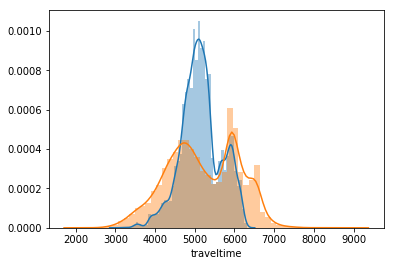

In [220]:
sns.distplot(mx['current_travel_time'])
sns.distplot(mx['traveltime'])

# So that is just about the death knell for this fucking approach.

# 0.2 accuracy. Mean absolute error and MAPE are comparable, but not quite as good for the big models.

In [231]:
for i in range(len(route)-1):
    node = nodes[i]
    data = stop_tools.stop_data(str(route[i]),str(route[i+1]))
    data = preprocess(data)
    preds=node.predict(data[features])
    print(metrics.r2_score(data['traveltime'],preds))
    print(metrics.mean_absolute_error(data['traveltime'],preds))
    print(((abs(data['traveltime']-preds)/data)*100).mean())
    print('\n\n')
    del(data)
    del(preds)

0.007098286577897905
5.256922059781159


/home/student/anaconda3/lib/python3.6/site-packages/pandas/core/indexes/base.py:3755: RuntimeWarning: '<' not supported between instances of 'str' and 'int', sort order is undefined for incomparable objects
  return this.join(other, how=how, return_indexers=return_indexers)


MemoryError: 

In [227]:
del(stop1)

In [228]:
del(stopN)

In [229]:
del(matrix)

In [230]:
del(mx)

In [10]:
wholeroutetime['traveltime']=wholeroutetime['actualtime_arr_to']-wholeroutetime['actualtime_arr_from']

# how does fake model fair for whole route

In [14]:
to_concat = []
for day in wholeroutetime['day'].unique():
    temp1 = wholeroutetime[wholeroutetime['day']==day]
    for hour in temp1['hour'].unique():
        temp2 = temp1[temp1['hour']==hour]
        temp2['mean']=temp2['traveltime'].mean()
        to_concat.append(temp2)
df = pd.concat(to_concat,axis=0)

/home/student/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


In [15]:
from sklearn import metrics
metrics.r2_score(df['traveltime'],df['mean'])

0.3684864530426344

In [16]:
((abs(df['traveltime']-df['mean'])/df['traveltime'])*100).mean()

11.664161014922097